# Análisis exploratorio de datos (EDA): _Películas y series de Disney+_

## Contenido

1. Descripción de los datos
2. Limpieza de datos
3. Missing Values
4. Visualización de Datos
5. Referencias

## 1. Descripción de los datos

Disney+ es una de las plataformas de streaming más populares, tiene alrededor de 1300 películas o series de televisión disponibles; a mediados de 2021, tenían alrededor de 116 millones de suscriptores mundialmente. 

En este proyecto se emplea el dataset [Disney+ Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows), consiste en el listado de todas las películas y series disponibles en la plataforma, junto con detalles como los que se listan a continuación:

#### Campos:

- <b> show_id:</b> id único por película
- <b> type:</b> película o serie
- <b> title:</b> nombre de la película/serie
- <b> director:</b> directores
- <b> cast:</b> reparto principal
- <b> country:</b> país (países) de producción
- <b> date_added:</b> fecha de liberación/adición en Disney+
- <b> release_year:</b> año de publicación/estreno original
- <b> rating:</b> clasificación
- <b> duration:</b> duración total
- <b> listed in:</b> género(s)
- <b> description:</b> descripción del material

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('default')
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#alt.renderers.enable('mimetype')

In [2]:
# Load dataset
directorio = "C:/Users/betop/Documents/MCD/4 S/Desarrollo de Proyecto II/Proyecto EDA/"
file = "disney_plus_titles.csv"
df = pd.read_csv(directorio + file)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
# Variables
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


## 2. Limpieza de datos

In [5]:
# Limpieza de datos inicial

# Eliminar palabra ' min',' Season' y 's' de columna duration
df['duration'] = df['duration'].replace({' min':''}, regex=True)
df['duration'] = df['duration'].replace({' Season':''}, regex=True)
df['duration'] = df['duration'].replace({'s':''}, regex=True)

# convertir a formato correcto de datos
df['date_added'] = pd.to_datetime(df['date_added'])
df = df.astype({'rating':'str','country':'str','duration':'int'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1450 non-null   object        
 1   type          1450 non-null   object        
 2   title         1450 non-null   object        
 3   director      977 non-null    object        
 4   cast          1260 non-null   object        
 5   country       1450 non-null   object        
 6   date_added    1447 non-null   datetime64[ns]
 7   release_year  1450 non-null   int64         
 8   rating        1450 non-null   object        
 9   duration      1450 non-null   int32         
 10  listed_in     1450 non-null   object        
 11  description   1450 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 130.4+ KB


In [6]:
## Variables cuantitativas
df.describe()

,release_year,duration
count,1450.000000,1450.000000
mean,2003.091724,52.753793
std,21.860162,46.557763
min,1928.000000,1.000000
25%,1999.000000,4.000000
50%,2011.000000,46.000000
75%,2018.000000,93.000000
max,2021.000000,183.000000


In [7]:
# Número de términos únicos por variable
df.nunique()

show_id         1450
type               2
title           1450
director         609
cast            1193
country           90
date_added       167
release_year      90
rating            10
duration         146
listed_in        329
description     1448
dtype: int64

### Información general de la base de datos

In [8]:
# cantidad de películas
print("- En la base de datos hay {0} películas y {1} series de televisión.".format(df.apply(lambda x: x['type'] == 'Movie', axis=1).sum(), df.apply(lambda x: x['type'] == 'TV Show', axis=1).sum()))

# fechas
print("- El rango de fechas de adición de películas/series va desde {0} hasta {1}.".format(df.date_added.min().strftime('%d/%m/%Y'), df.date_added.max().strftime('%d/%m/%Y')))
print("- El rango de fechas de estreno de películas/series va desde {0} hasta {1}.".format(df.release_year.min(), df.release_year.max()))

# rating
print("- Las clasificaciones de las películas/series:")
for i in df.rating.unique():
    print("    * "+i)
    
# géneros
# obtener listado de géneros
generos = df['listed_in'].str.split(', ', expand=True)
generos = pd.concat([generos[0],generos[1],generos[2]],axis=0)
generos = pd.DataFrame(generos.astype(str))
generos_unico = generos[0].unique()
generos_unico = pd.DataFrame(generos_unico.astype(str))

print("- Hay {0} géneros distintos, entre los cuales se encuentran: ".format(generos_unico[0].count()))
for i in generos_unico[0].sample(10):
    print("    * "+i)

# países
#obtener listado de países
pais = df['country'].str.split(', ', expand=True)
pais = pd.concat([pais[0],pais[1],pais[2],pais[3],pais[4],pais[5],pais[6],pais[7],pais[8],pais[9],pais[10],pais[11],pais[12],pais[13],pais[14]],axis=0)
pais = pd.DataFrame(pais.astype(str))
pais_unico = pais[0].unique()
pais_unico = pd.DataFrame(pais_unico.astype(str))

print("- Existen {0} países distintos de producción, entre los cuales se encuentran: ".format(pais_unico[0].count()))
for i in pais_unico[0].sample(10):
    print("    * "+i)

- En la base de datos hay 1052 películas y 398 series de televisión.
- El rango de fechas de adición de películas/series va desde 01/10/2019 hasta 26/11/2021.
- El rango de fechas de estreno de películas/series va desde 1928 hasta 2021.
- Las clasificaciones de las películas/series:
    * TV-G
    * PG
    * TV-PG
    * nan
    * PG-13
    * TV-14
    * G
    * TV-Y7
    * TV-Y
    * TV-Y7-FV
- Hay 45 géneros distintos, entre los cuales se encuentran: 
    * Anime
    * Series
    * Family
    * Sports
    * Documentary
    * Romance
    * Disaster
    * Crime
    * Fantasy
    * Historical
- Existen 49 países distintos de producción, entre los cuales se encuentran: 
    * Denmark
    * Sweden
    * Iran
    * Mexico
    * United Arab Emirates
    * Poland
    * Austria
    * Ireland
    * South Korea
    * Belgium


In [9]:
series_tv = df[df['type']=='TV Show']
#series_tv[series_tv['duration']>10]

In [10]:
genre_count = df.copy()
genre_count = pd.concat([genre_count, df['listed_in'].str.split(', ', expand=True)],axis=1)
genre_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,0,1,2
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",nan,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,Animation,Family,None
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",nan,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,Comedy,None,None
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Animation,Comedy,Family
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",nan,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!",Musical,None,None
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",nan,2021-11-25,2021,nan,1,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Docuseries,Historical,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Action-Adventure,Family,Science Fiction
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Action-Adventure,Comedy,Family
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Biographical,Comedy,Drama
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,Buddy,Comedy,Coming of Age


## 3. Missing values

In [11]:
# Revisar los missing values
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country           0
date_added        3
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

Dado que no realizaremos mayor análisis sobre directores y reparto, eliminaremos dichas columnas.

In [12]:
df2 = df.drop(columns=['director', 'cast'])
df2.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      3
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Verificamos los registros que contienen valores nulos en fecha de adición

In [13]:
df2[df2['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1439,s1440,TV Show,Disney Kirby Buckets,United States,NaT,2014,TV-Y7,3,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,Canada,NaT,2016,TV-Y7,2,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,s1442,TV Show,Imagination Movers,United States,NaT,2008,TV-Y,3,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


Se procede a eliminar los 3 registros donde no se tiene fecha de adición

In [14]:
df2=df2.dropna(subset=['date_added'])
df2.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df2=df2.reset_index(drop=True)

## 4. Visualización de datos

### Top 10 géneros

In [16]:
source = pd.DataFrame(generos[0].value_counts()).reset_index()
source.columns = ['Género','Frecuencia']
source = source.drop(source[(source['Género'] =="None")].index)
source = source[:10]

Text(0.5, 1.0, 'Top 10 géneros')

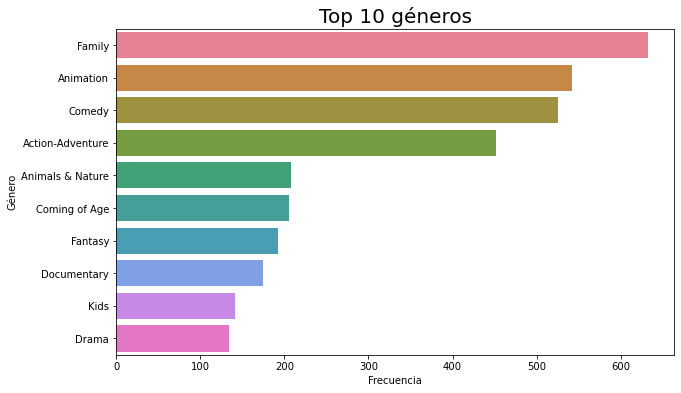

In [17]:
plt.subplots(figsize=(10,6))
plot=sns.barplot(data=source,y="Género",x="Frecuencia",orient="h",palette="husl")
plt.title("Top 10 géneros",fontdict={'size':20})

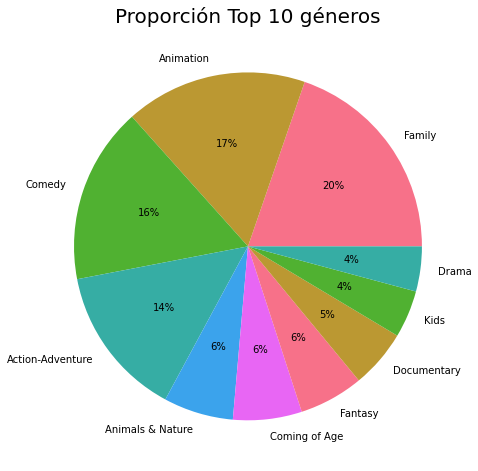

In [18]:
data = source["Frecuencia"]
labels = source["Género"]
colors = sns.color_palette('husl')[0:9]
plt.subplots(figsize=(8,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción Top 10 géneros",fontdict={'size':20})
plt.show()

### Top 10 países

In [19]:
source = pd.DataFrame(pais[0].value_counts()).reset_index()
source.columns = ['País','Frecuencia']
source = source.drop(source[(source['País'] =="None")].index)
source = source.drop(source[(source['País'] =="nan")].index)
source = source[:10]

Text(0.5, 1.0, 'Top 10 Países productores')

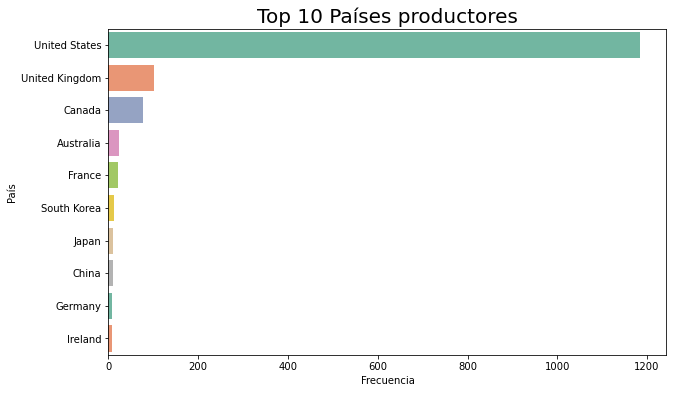

In [20]:
plt.subplots(figsize=(10,6))
plot=sns.barplot(data=source,y="País",x="Frecuencia",orient="h",palette="Set2")
plt.title("Top 10 Países productores",fontdict={'size':20})

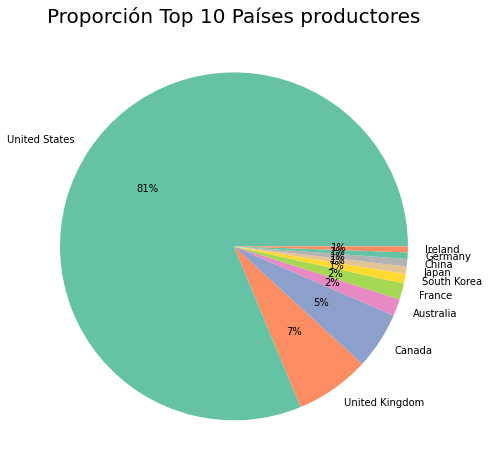

In [21]:
data = source["Frecuencia"]
labels = source["País"]
colors = sns.color_palette('Set2')[0:9]
plt.subplots(figsize=(8,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción Top 10 Países productores",fontdict={'size':20})
plt.show()

### Duración películas y series

In [22]:
series_tv = df2[df2['type']=='TV Show']
peliculas = df2[df2['type']=='Movie']

In [23]:
source = pd.DataFrame(series_tv['duration'].value_counts()).reset_index()
source.columns = ['Temporadas','Frecuencia']
source = source.sort_values(by=['Temporadas'])

Text(0.5, 1.0, 'Duración de series de TV')

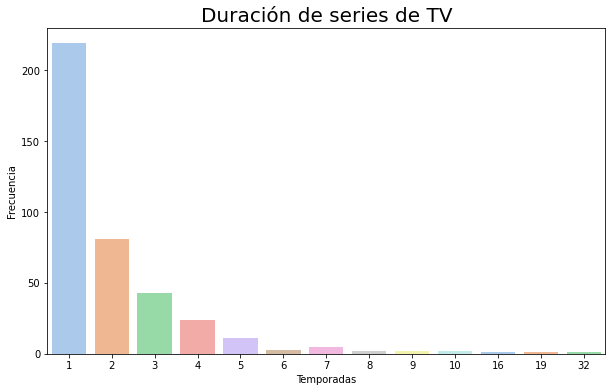

In [24]:
plt.subplots(figsize=(10,6))
plot=sns.barplot(data=source,x="Temporadas",y="Frecuencia",orient="v",palette="pastel")
plt.title("Duración de series de TV",fontdict={'size':20})

Text(0, 0.5, 'Frecuencia')

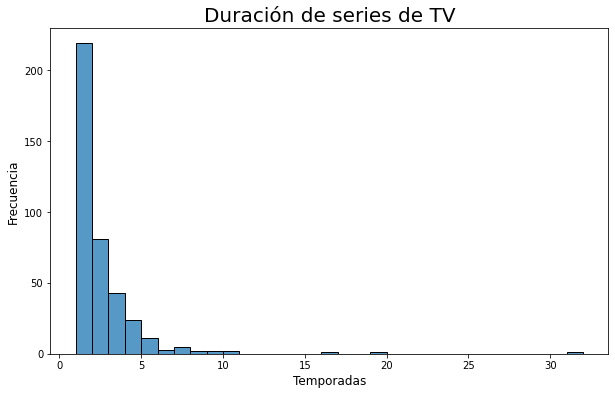

In [25]:
plt.subplots(figsize=(10,6))
sns.histplot(series_tv,x="duration",palette="pastel",binwidth=1)
plt.title("Duración de series de TV",fontdict={'size':20})
plt.xlabel('Temporadas',fontdict={'size':12})
plt.ylabel('Frecuencia',fontdict={'size':12})

In [26]:
source = pd.DataFrame(peliculas['duration'].value_counts()).reset_index()
source.columns = ['Minutos','Frecuencia']
source = source.sort_values(by=['Minutos'])

Text(0.5, 1.0, 'Duración de películas')

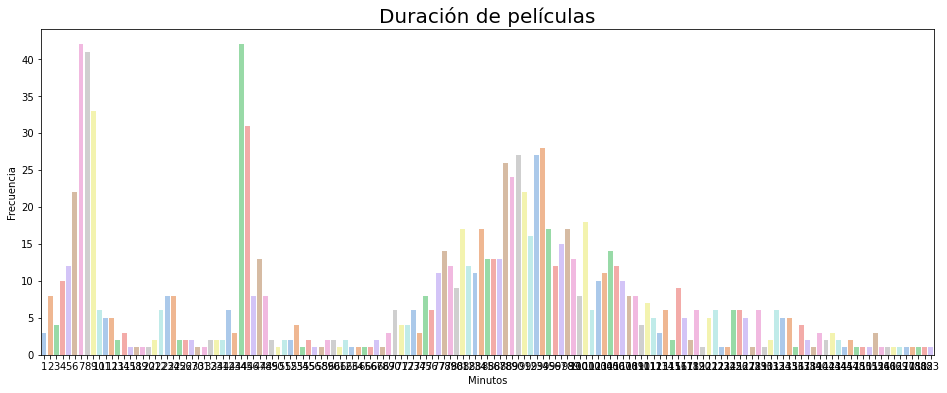

In [27]:
plt.subplots(figsize=(16,6))
plot=sns.barplot(data=source,x="Minutos",y="Frecuencia",orient="v",palette="pastel")
plt.title('Duración de películas',fontdict={'size':20})

Text(0, 0.5, 'Frecuencia')

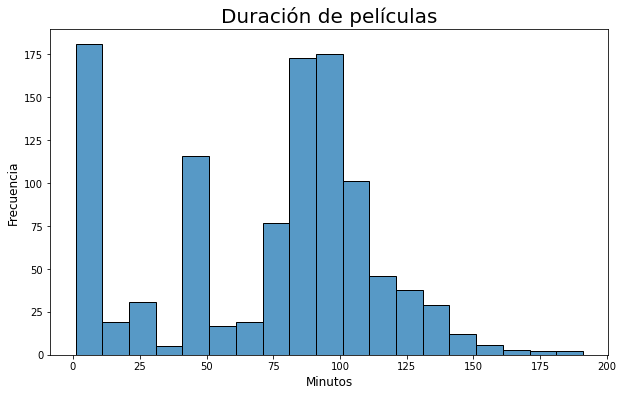

In [28]:
plt.subplots(figsize=(10,6))
plot=sns.histplot(data=peliculas,x="duration",binwidth=10)
plt.title('Duración de películas',fontdict={'size':20})
plt.xlabel('Minutos',fontdict={'size':12})
plt.ylabel('Frecuencia',fontdict={'size':12})

Text(0, 0.5, 'Minutos')

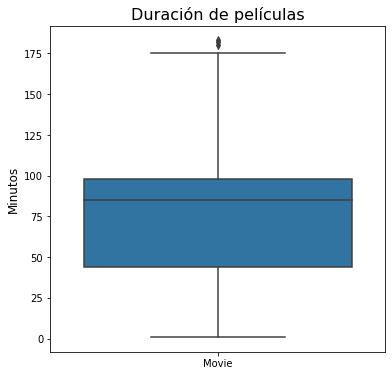

In [29]:
plt.subplots(figsize=(6,6))
plot=sns.boxplot(x="type", y="duration", data=peliculas)
plt.title('Duración de películas',fontdict={'size':16})
plt.xlabel('',fontdict={'size':12})
plt.ylabel('Minutos',fontdict={'size':12})

Text(0, 0.5, 'Temporadas')

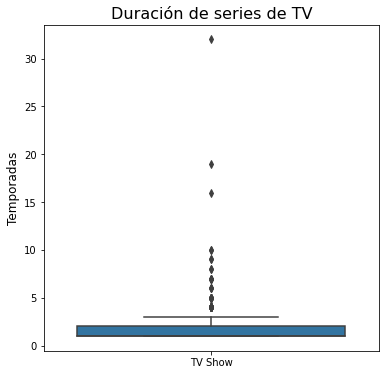

In [30]:
plt.subplots(figsize=(6,6))
plot=sns.boxplot(x="type", y="duration", data=series_tv)
plt.title('Duración de series de TV',fontdict={'size':16})
plt.xlabel('',fontdict={'size':12})
plt.ylabel('Temporadas',fontdict={'size':12})

### Fechas adición y estreno

Text(0, 0.5, 'Frecuencia')

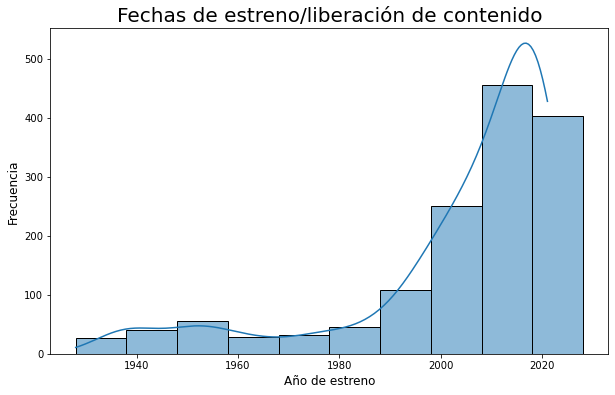

In [31]:
plt.subplots(figsize=(10,6))
plot=sns.histplot(data=df2,x="release_year",binwidth=10,kde=True)
plt.title('Fechas de estreno/liberación de contenido',fontdict={'size':20})
plt.xlabel('Año de estreno',fontdict={'size':12})
plt.ylabel('Frecuencia',fontdict={'size':12})

Text(0, 0.5, 'Frecuencia')

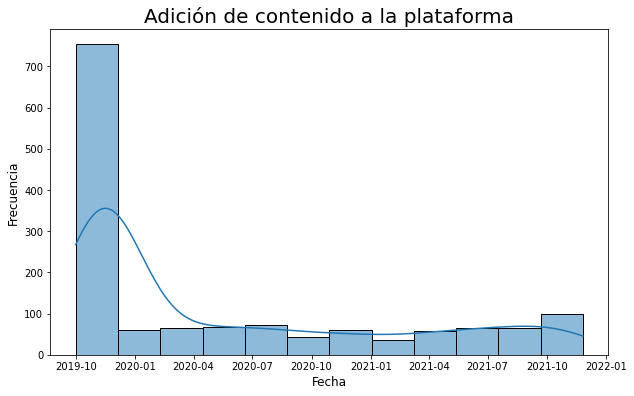

In [32]:
plt.subplots(figsize=(10,6))
plot=sns.histplot(data=df2,x="date_added",kde=True,bins=12)
plt.title('Adición de contenido a la plataforma',fontdict={'size':20})
plt.xlabel('Fecha',fontdict={'size':12})
plt.ylabel('Frecuencia',fontdict={'size':12})

### Clasificación

In [33]:
source = pd.DataFrame(df2['rating'].value_counts()).reset_index()
source.columns = ['Clasificación','Frecuencia']
source = source.drop(source[(source['Clasificación'] =="nan")].index)

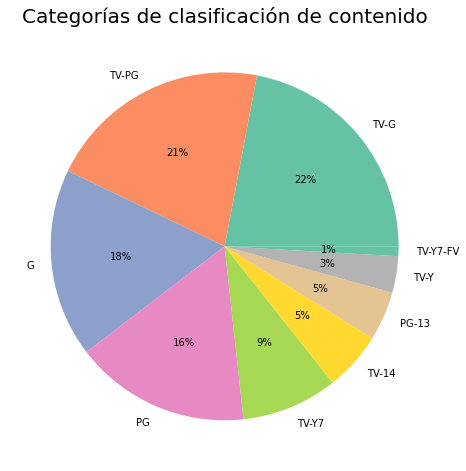

In [34]:
data = source["Frecuencia"]
labels = source["Clasificación"]
colors = sns.color_palette('Set2')[0:9]
plt.subplots(figsize=(8,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Categorías de clasificación de contenido",fontdict={'size':20})
plt.show()

### Título

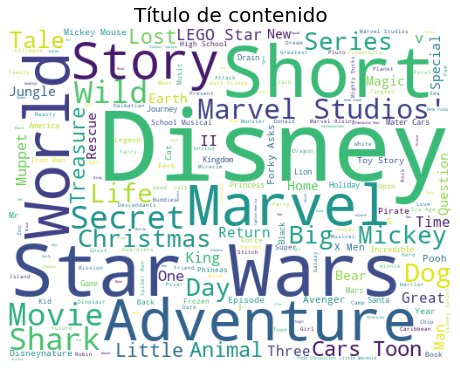

In [35]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(" ".join(df2['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Título de contenido",fontdict={'size':20})
plt.show()

### Descripción

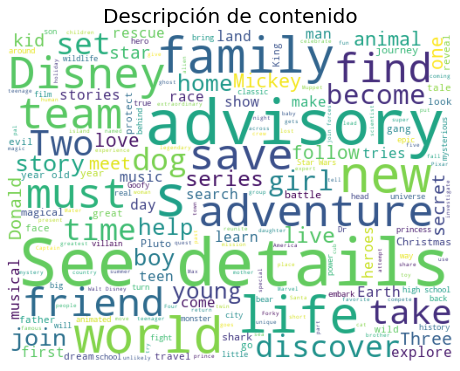

In [36]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(" ".join(df2['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Descripción de contenido",fontdict={'size':20})
plt.show()

## 5. Referencias

- [Material del curso Desarrollo de Proyectos II](https://github.com/vcuspinera/UDG_MCD_Project_Dev_II)
- [Actividad 11: Estructura de repositorio](https://github.com/vcuspinera/UDG_MCD_Project_Dev_II/blob/main/actividades/11_Repo_structure.md)
- [Actividad 12: Visualización con Altair](https://github.com/vcuspinera/UDG_MCD_Project_Dev_II/blob/main/actividades/12_Viz_Altair.ipynb)
- [Actividad 13: Análisis Exploratorio de Datos (EDA)](https://github.com/vcuspinera/UDG_MCD_Project_Dev_II/blob/main/actividades/13_EDA.ipynb)